In [1]:
import pandas as pd
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Assuming this function needs to be defined:
def fahrenheit_to_celsius(temp_f):
    return (temp_f - 32) * 5/9

class SoyGDD:
    def __init__(self, daily_temp_df, time_column, min_temp_column, max_temp_column, celsius=True):
        self.daily_temp_df = daily_temp_df
        self.time_column = time_column
        self.min_temp_column = min_temp_column
        self.max_temp_column = max_temp_column
        self.celsius = celsius

        # Ensure the time column is of datetime type
        self.daily_temp_df[self.time_column] = pd.to_datetime(self.daily_temp_df[self.time_column])

        # Convert the temperature to Celsius if required
        if not self.celsius:
            self.daily_temp_df[self.min_temp_column] = self.daily_temp_df[self.min_temp_column].apply(fahrenheit_to_celsius)
            self.daily_temp_df[self.max_temp_column] = self.daily_temp_df[self.max_temp_column].apply(fahrenheit_to_celsius)
    
    def soy_gdd(self, start_date, end_date):
        start_date = pd.Timestamp(start_date)
        end_date = pd.Timestamp(end_date)

        date_mask = (self.daily_temp_df[self.time_column] >= start_date) & (self.daily_temp_df[self.time_column] <= end_date)
        masked_data = self.daily_temp_df.loc[date_mask].copy()

        gdd_values = []
        cumulative_gdd = 0

        for index, row in masked_data.iterrows():
            min_temp = max(row[self.min_temp_column], 10 if self.celsius else 50)
            max_temp = min(row[self.max_temp_column], 30 if self.celsius else 86)

            mean_temp = (min_temp + max_temp) / 2
            base_temp = 10 if self.celsius else 50
            gdd = max(mean_temp - base_temp, 0)

            gdd_values.append(gdd)
            cumulative_gdd += gdd

        masked_data['GDD'] = gdd_values
        masked_data['Cumulative_GDD'] = masked_data['GDD'].cumsum()

        return masked_data


In [3]:
import pandas as pd

Wadena = pd.read_csv("Wadena_County_NOAA_nClimGrid.csv")
Cass = pd.read_csv("Cass_County_NOAA_nClimGrid.csv")
Crow_Wing = pd.read_csv("Crow_Wing_County_NOAA_nClimGrid.csv")
Todd = pd.read_csv("Todd_County_NOAA_nClimGrid.csv")
Morrison = pd.read_csv("Morrison_County_NOAA_nClimGrid.csv")
Douglas = pd.read_csv("Douglas_County_NOAA_nClimGrid.csv")
Otter_Tail = pd.read_csv("Otter_Tail_County_NOAA_nClimGrid.csv")
Pope = pd.read_csv("Pope_County_NOAA_nClimGrid.csv")
Stearns = pd.read_csv("Stearns_County_NOAA_nClimGrid.csv")
Sherburne = pd.read_csv("Sherburne_County_NOAA_nClimGrid.csv")
Benton = pd.read_csv("Benton_County_NOAA_nClimGrid.csv")
Becker = pd.read_csv("Becker_County_NOAA_nClimGrid.csv")
Hubbard= pd.read_csv("Hubbard_County_NOAA_nClimGrid.csv")
Kandiyohi= pd.read_csv("Kandiyohi_County_NOAA_nClimGrid.csv")



In [4]:
import pandas as pd

# Define Fahrenheit conversion
def c_to_f(temp_c):
    return (temp_c * 9/5) 
"""
https://www.linkedin.com/pulse/unit-transformation-degree-days-between-celsius-fahrenheit-yin/
"""

# Dictionary of all counties
# list of county DataFrames
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}
# Loop through each county
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])
    all_years = []

    for year in range(1951, 2025):
        soy = SoyGDD(df, 'time', 'tmin', 'tmax')
        start = pd.to_datetime(f"{year}-01-01").date()
        end = pd.to_datetime(f"{year}-12-31").date()

        gdd_df = soy.soy_gdd(start, end)
        gdd_df['Year'] = year
        gdd_df['GDD'] = gdd_df['GDD'].apply(c_to_f)
        gdd_df['Cumulative_GDD'] = gdd_df['Cumulative_GDD'].apply(c_to_f)

        all_years.append(gdd_df)

    # Combine and save
    historical_df = pd.concat(all_years, ignore_index=True)
    historical_df.to_csv(f"{county_name}_Soybean_GDD_1951_2024.csv", index=False)
    print(f"Saved: {county_name}_Soybean_GDD_1951_2024.csv")


Saved: Wadena_Soybean_GDD_1951_2024.csv
Saved: Cass_Soybean_GDD_1951_2024.csv
Saved: Crow_Wing_Soybean_GDD_1951_2024.csv
Saved: Todd_Soybean_GDD_1951_2024.csv
Saved: Morrison_Soybean_GDD_1951_2024.csv
Saved: Douglas_Soybean_GDD_1951_2024.csv
Saved: Otter_Tail_Soybean_GDD_1951_2024.csv
Saved: Pope_Soybean_GDD_1951_2024.csv
Saved: Stearns_Soybean_GDD_1951_2024.csv
Saved: Sherburne_Soybean_GDD_1951_2024.csv
Saved: Benton_Soybean_GDD_1951_2024.csv
Saved: Becker_Soybean_GDD_1951_2024.csv
Saved: Hubbard_Soybean_GDD_1951_2024.csv
Saved: Kandiyohi_Soybean_GDD_1951_2024.csv


In [5]:
import pandas as pd
from datetime import datetime, timedelta

# Function to convert Celsius GDD to Fahrenheit GDD
def celsius_to_fahrenheit(c):
    return c * 9 / 5
# Output folder path
output_folder = "Soy_Simulated AllCounties_GDD_1951_2024"
os.makedirs(output_folder, exist_ok=True)
# Dictionary of your county dataframes (make sure they are defined properly)
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Loop through each county and year
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])

    all_planting_results = []
    for year in range(1951, 2025):
        soy = SoyGDD(df, 'time', 'tmin', 'tmax')  # Your existing GDD class
        start_year = pd.to_datetime(f"{year}-04-15")
        end_year = pd.to_datetime(f"{year}-12-31")
        full_gdd_df = soy.soy_gdd(start_year.date(), end_year.date())
        full_gdd_df['time'] = pd.to_datetime(full_gdd_df['time'])
        full_gdd_df['GDD'] = celsius_to_fahrenheit(full_gdd_df['GDD'])

        planting_dates = pd.date_range(f"{year}-04-15",f"{year}-06-15", freq = 'D')

        for planting_date in planting_dates:
            sub_df = full_gdd_df[full_gdd_df['time'] >= planting_date].copy()
            sub_df['Year'] = year
            sub_df['Planting Date'] = planting_date.date()
            sub_df['DAP'] = (sub_df['time'] - planting_date).dt.days
            sub_df['Cumulative_GDD'] = sub_df['GDD'].cumsum()
            all_planting_results.append(sub_df)

    historical_df = pd.concat(all_planting_results, ignore_index=True)
    output_name = os.path.join(output_folder, f"{county_name}_AllPlantingDates_Soy_GDD_1951_2024.csv")
    historical_df.to_csv(output_name, index=False)
    print(f"Saved: {output_name}")

Saved: Soy_Simulated AllCounties_GDD_1951_2024/Wadena_AllPlantingDates_Soy_GDD_1951_2024.csv
Saved: Soy_Simulated AllCounties_GDD_1951_2024/Cass_AllPlantingDates_Soy_GDD_1951_2024.csv
Saved: Soy_Simulated AllCounties_GDD_1951_2024/Crow_Wing_AllPlantingDates_Soy_GDD_1951_2024.csv
Saved: Soy_Simulated AllCounties_GDD_1951_2024/Todd_AllPlantingDates_Soy_GDD_1951_2024.csv
Saved: Soy_Simulated AllCounties_GDD_1951_2024/Morrison_AllPlantingDates_Soy_GDD_1951_2024.csv
Saved: Soy_Simulated AllCounties_GDD_1951_2024/Douglas_AllPlantingDates_Soy_GDD_1951_2024.csv
Saved: Soy_Simulated AllCounties_GDD_1951_2024/Otter_Tail_AllPlantingDates_Soy_GDD_1951_2024.csv
Saved: Soy_Simulated AllCounties_GDD_1951_2024/Pope_AllPlantingDates_Soy_GDD_1951_2024.csv
Saved: Soy_Simulated AllCounties_GDD_1951_2024/Stearns_AllPlantingDates_Soy_GDD_1951_2024.csv
Saved: Soy_Simulated AllCounties_GDD_1951_2024/Sherburne_AllPlantingDates_Soy_GDD_1951_2024.csv
Saved: Soy_Simulated AllCounties_GDD_1951_2024/Benton_AllPlant

In [6]:
import pandas as pd
import os

# All counties
counties = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Hubbard", "Kandiyohi"
]
output_folder = "AllCounties_SoyGrowthStages_1951_2022_withBeckerRef"
os.makedirs(output_folder, exist_ok=True)

# === Step 1: Load Becker 2024 thresholds ===
becker = pd.read_csv("Becker 2024 Soy growth stages.csv")
becker.columns = becker.columns.str.strip()
becker["Date"] = pd.to_datetime(becker["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

# Set reference planting date
planting_date_2024 = pd.Timestamp("2024-05-08")

# Becker thresholds by stage (mode-based)
ordered_stages = [
    'VE', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
    'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'
]
becker_stage_data = becker[["Growth Stage", "Date", "AGDD"]].dropna()
becker_stage_data["Becker DAP"] = (becker_stage_data["Date"] - planting_date_2024).dt.days
becker_thresholds = (
    becker_stage_data
    .drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
    .rename(columns={"Growth Stage": "Stage", "AGDD": "Becker AGDD"})
)
becker_thresholds = becker_thresholds[becker_thresholds["Stage"].isin(ordered_stages)].reset_index(drop=True)

# === Step 2: Process Each County ===
for county in counties:
    input_file = f"Soy_Simulated AllCounties_GDD_1951_2024/{county}_AllPlantingDates_Soy_GDD_1951_2024.csv"
    if not os.path.exists(input_file):
        print(f"File not found: {input_file}")
        continue

    df = pd.read_csv(input_file)
    df["time"] = pd.to_datetime(df["time"])
    df["Planting Date"] = pd.to_datetime(df["Planting Date"])
    df = df[df["Year"].between(1951, 2025)].copy()

    results = []
    for (year, planting), group in df.groupby(["Year", "Planting Date"]):
        group = group[group["time"] >= planting].sort_values("time").copy()
        group["Cumulative_GDD"] = group["GDD"].cumsum()

        for _, row in becker_thresholds.iterrows():
            stage = row["Stage"]
            becker_agdd = row["Becker AGDD"]
            becker_dap = row["Becker DAP"]

            met = group[group["Cumulative_GDD"] >= becker_agdd]
            if not met.empty:
                first_hit = met.iloc[0]
                dap_reached = (first_hit["time"] - planting).days
                agdd_reached = round(first_hit["Cumulative_GDD"], 1)
                results.append({
                    "Crop": "Soybean",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": dap_reached,
                    "Δ DAP": dap_reached - becker_dap,
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": agdd_reached,
                    "Delta AGDD (Compared to Becker)": round(agdd_reached - becker_agdd, 1)
                })
            else:
                results.append({
                    "Crop": "Soybean",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": "",
                    "Δ DAP": "",
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": "",
                    "Delta AGDD (Compared to Becker)": ""
                })

    out_df = pd.DataFrame(results)
    out_path = f"{output_folder}/{county}_Soy_GrowthStages_1951_2022_with_BeckerReference.csv"
    out_df.to_csv(out_path, index=False)
    print(f"Saved: {out_path}")

Saved: AllCounties_SoyGrowthStages_1951_2022_withBeckerRef/Wadena_Soy_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_SoyGrowthStages_1951_2022_withBeckerRef/Cass_Soy_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_SoyGrowthStages_1951_2022_withBeckerRef/Crow_Wing_Soy_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_SoyGrowthStages_1951_2022_withBeckerRef/Todd_Soy_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_SoyGrowthStages_1951_2022_withBeckerRef/Morrison_Soy_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_SoyGrowthStages_1951_2022_withBeckerRef/Douglas_Soy_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_SoyGrowthStages_1951_2022_withBeckerRef/Otter_Tail_Soy_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_SoyGrowthStages_1951_2022_withBeckerRef/Pope_Soy_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_SoyGrowthStages_1951_2022_withBec

In [7]:
import pandas as pd
import os
import glob

# Set the folder containing your CSV files
input_folder = "AllCounties_SoyGrowthStages_1951_2022_withBeckerRef"
output_file = "AllCounties_SoyGrowthStages_1951_2022_withBeckerRef_combined.csv"

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

# Combine all CSV files into one DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(output_file, index=False)

print(f"Combined CSV saved as: {output_file}")


Combined CSV saved as: AllCounties_SoyGrowthStages_1951_2022_withBeckerRef_combined.csv


In [8]:
import pandas as pd

# Load growth stage data and NOAA daily weather
df = pd.read_csv("AllCounties_SoyGrowthStages_1951_2022_withBeckerRef_combined.csv")
# Preprocessing
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")

# Filter for VT and R1 stages
df_filtered = df[df["Stage"].isin(["R3","R4"])]
dap_pivot = df_filtered.pivot_table(index=["Year", "County", "Planting Date"], columns="Stage", values="DAP Reached").reset_index()
dap_pivot = dap_pivot.dropna(subset=["R3", "R4"])
dap_pivot["R3_to_R4_Duration"] = dap_pivot["R4"] - dap_pivot["R3"]

# Initialize an empty list to collect cleaned yearly data
cleaned = []

# Loop over each year, apply IQR filtering
for year, group in dap_pivot.groupby("Year"):
    q1 = group["R3_to_R4_Duration"].quantile(0.25)
    q3 = group["R3_to_R4_Duration"].quantile(0.7)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Filter rows within year-specific IQR range
    filtered = group[
        (group["R3_to_R4_Duration"] >= lower) & 
        (group["R3_to_R4_Duration"] <= upper)
    ]
    
    cleaned.append(filtered)

# Combine all into clean_dap
clean_dap = pd.concat(cleaned, ignore_index=True)




In [9]:
import pandas as pd

# Load NOAA and parse time
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")
noaa["time"] = pd.to_datetime(noaa["time"], errors="coerce")
noaa = noaa.dropna(subset=["time"]).sort_values("time").set_index("time")

# Optional: normalize county strings to avoid mismatches
noaa["County"] = noaa["County"].astype(str).str.strip()

# Pre-split NOAA by county for fast lookup
noaa_by_county = dict(tuple(noaa.groupby("County", sort=False)))

precip_data = []

for _, row in clean_dap.iterrows():
    county = str(row["County"]).strip()
    year = row["Year"]

    # Compute R3/R4 dates
    r3_date = row["Planting Date"] + pd.to_timedelta(row["R3"], unit="D")
    r4_date = row["Planting Date"] + pd.to_timedelta(row["R4"], unit="D")

    # Skip if dates are missing
    if pd.isna(r3_date) or pd.isna(r4_date):
        continue

    # Ensure start <= end
    start, end = (r3_date, r4_date) if r3_date <= r4_date else (r4_date, r3_date)

    # Get this county's weather
    county_weather = noaa_by_county.get(county)
    if county_weather is None:
        continue

    # Slice inclusive R3–R4 window
    date_filtered = county_weather.loc[start:end]

    # Sum precip (assumes 'prcp' is in mm)
    total_precip = date_filtered["prcp"].sum(skipna=True)

    precip_data.append({
        "Year": year,
        "County": county,
        "Planting Date": row["Planting Date"],
        "R3_Date": r3_date,
        "R4_Date": r4_date,
        "Precipitation (mm)": total_precip
    })

precip_df = pd.DataFrame(precip_data)


In [10]:
# Define planting window (May 1 – May 10 of each year)
planting_start = pd.to_datetime("05-01", format="%m-%d")
planting_end   = pd.to_datetime("05-10", format="%m-%d")

precip_data = []

for _, row in clean_dap.iterrows():
    county = str(row["County"]).strip()
    year = row["Year"]
    planting_date = row["Planting Date"]

    # Skip if planting date is missing
    if pd.isna(planting_date):
        continue

    # Filter planting dates within May 1–May 10 window
    if not (planting_start.replace(year=year) <= planting_date <= planting_end.replace(year=year)):
        continue

    # Compute R3/R4 dates
    r3_date = planting_date + pd.to_timedelta(row["R3"], unit="D")
    r4_date = planting_date + pd.to_timedelta(row["R4"], unit="D")

    if pd.isna(r3_date) or pd.isna(r4_date):
        continue

    start, end = (r3_date, r4_date) if r3_date <= r4_date else (r4_date, r3_date)

    county_weather = noaa_by_county.get(county)
    if county_weather is None:
        continue

    date_filtered = county_weather.loc[start:end]
    total_precip = date_filtered["prcp"].sum(skipna=True)

    precip_data.append({
        "Year": year,
        "County": county,
        "Planting Date": planting_date,
        "R3_Date": r3_date,
        "R4_Date": r4_date,
        "Precipitation (mm)": total_precip
    })

precip_df_plantingwindow = pd.DataFrame(precip_data)


In [11]:
precip_df_plantingwindow

,Year,County,Planting Date,R3_Date,R4_Date,Precipitation (mm)
0,1951,Benton,1951-05-01,1951-08-05,1951-08-24,72.121732
1,1951,Benton,1951-05-02,1951-08-06,1951-08-26,73.416374
2,1951,Benton,1951-05-03,1951-08-07,1951-08-26,71.301260
3,1951,Benton,1951-05-04,1951-08-08,1951-08-27,62.963170
4,1951,Benton,1951-05-05,1951-08-08,1951-08-28,68.279895
...,...,...,...,...,...,...
8039,2024,Wadena,2024-05-06,2024-08-04,2024-08-21,47.960866
8040,2024,Wadena,2024-05-07,2024-08-05,2024-08-22,43.189915
8041,2024,Wadena,2024-05-08,2024-08-05,2024-08-22,43.189915
8042,2024,Wadena,2024-05-09,2024-08-06,2024-08-23,49.408594


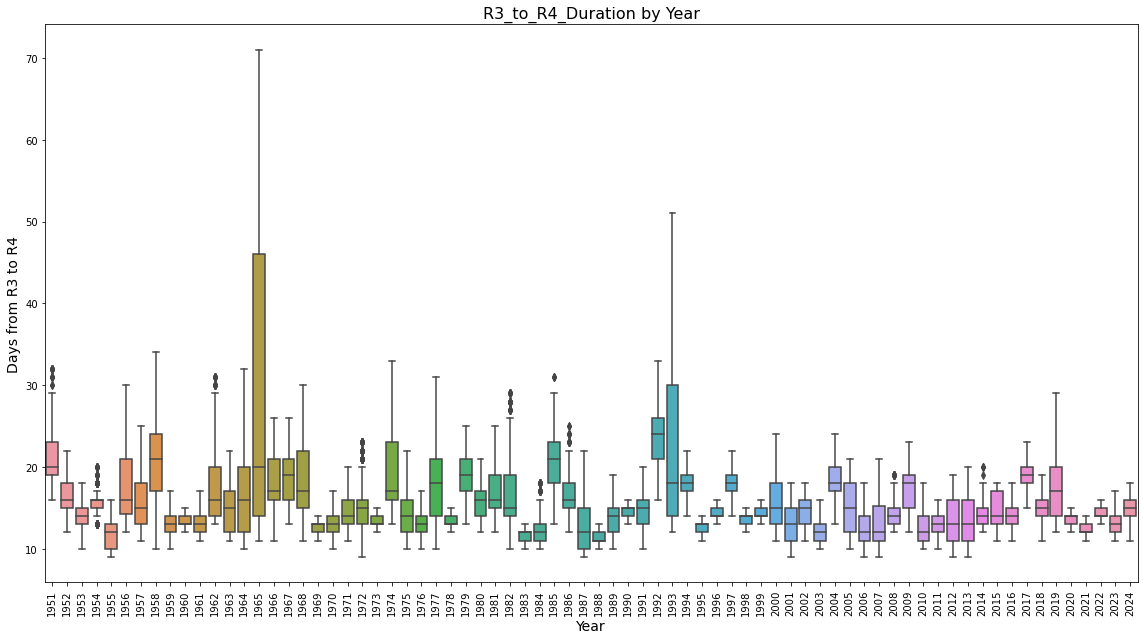

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot R3 ro R5 duration per year from clean_dap
plt.figure(figsize=(16, 9))
sns.boxplot(data=clean_dap, x="Year", y="R3_to_R4_Duration")
plt.title("R3_to_R4_Duration by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Days from R3 to R4", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
precip_df

,Year,County,Planting Date,R3_Date,R4_Date,Precipitation (mm)
0,1951,Benton,1951-04-15,1951-08-02,1951-08-20,69.677136
1,1951,Benton,1951-04-16,1951-08-02,1951-08-20,69.677136
2,1951,Benton,1951-04-17,1951-08-02,1951-08-20,69.677136
3,1951,Benton,1951-04-18,1951-08-02,1951-08-20,69.677136
4,1951,Benton,1951-04-19,1951-08-02,1951-08-20,69.677136
...,...,...,...,...,...,...
45761,2024,Wadena,2024-06-11,2024-08-27,2024-09-13,10.928551
45762,2024,Wadena,2024-06-12,2024-08-28,2024-09-14,8.744673
45763,2024,Wadena,2024-06-13,2024-08-29,2024-09-14,8.631250
45764,2024,Wadena,2024-06-14,2024-08-30,2024-09-15,8.481818


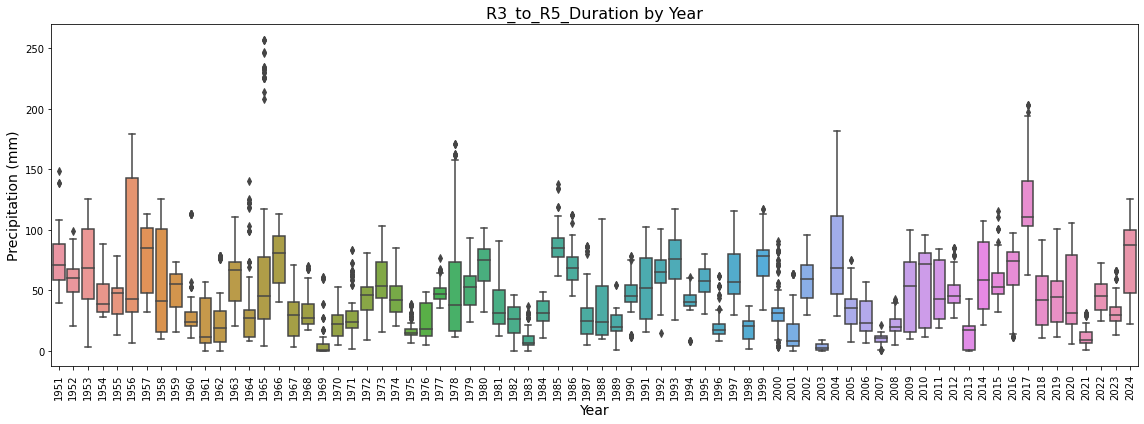

In [14]:
# Create the boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(data=precip_df_plantingwindow, x="Year", y="Precipitation (mm)")

plt.title("R3_to_R5_Duration by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Precipitation (mm)", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

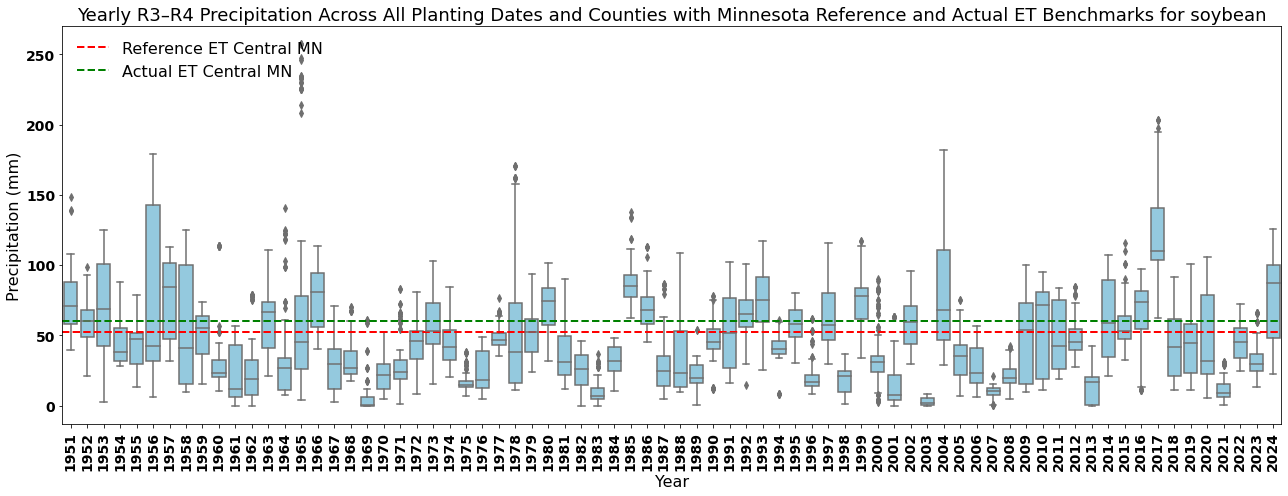

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Minnesota ET benchmark in mm
ref_et_Central_MN_mm = 52.38
# Actual ET (scaled by 1.15 KC FAO)
actual_et_Central_MN_mm = 1.15 * ref_et_Central_MN_mm

# Create the boxplot
plt.figure(figsize=(18, 7))
sns.boxplot(data=precip_df_plantingwindow, x="Year", y="Precipitation (mm)", color="skyblue")

# Add benchmark line (reference ET)
plt.axhline(ref_et_Central_MN_mm, color='red', linestyle='--', linewidth=2, 
            label=f'Reference ET Central MN')

# Add actual ET line
plt.axhline(actual_et_Central_MN_mm, color='green', linestyle='--', linewidth=2, 
            label=f'Actual ET Central MN')

# Customize the plot
plt.title("Yearly R3–R4 Precipitation Across All Planting Dates and Counties with Minnesota Reference and Actual ET Benchmarks for soybean", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Precipitation (mm)", fontsize=16)

# Tick labels
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Legend with larger font
plt.legend(loc="upper left", fontsize=16, frameon=False)

# Save at 300 dpi for publication
plt.tight_layout()
plt.savefig(
    "Soy_Simulated AllCounties_GDD_1951_2024/r3_r4_precip_boxplot_Minnesota.png",
    dpi=300, bbox_inches='tight'
)

plt.show()


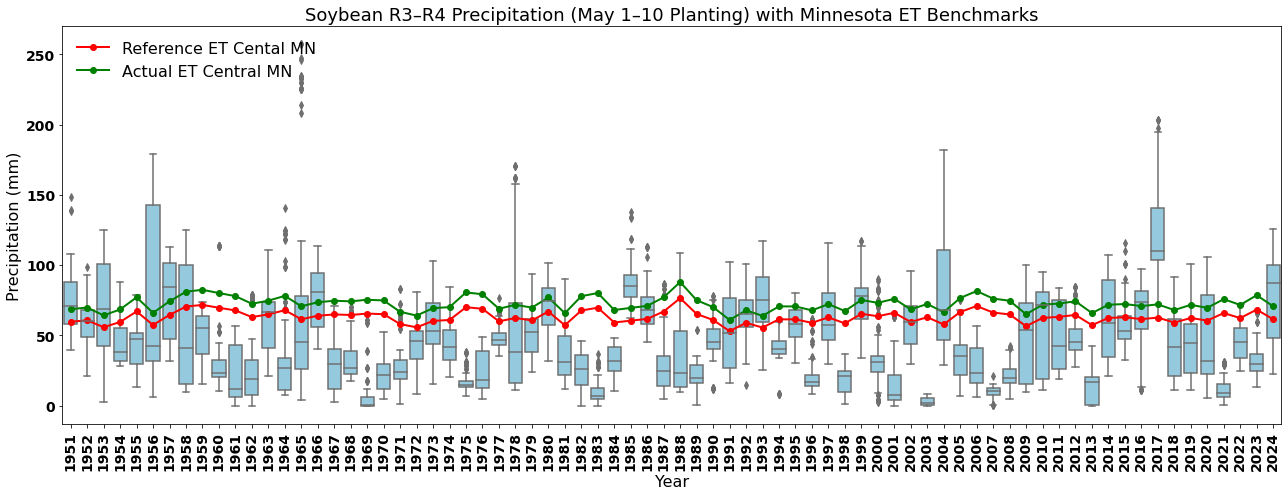

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Load ET data ---
et_df = pd.read_csv("HS ET data/Cumulative_ET_July27_Aug8_1951_2024.csv")

# Ensure years are sorted consistently
years = sorted(precip_df_plantingwindow["Year"].unique())

# Create mapping Year → ET values
ref_map = dict(zip(et_df["Year"], et_df["RefET_soy_R3-R4"]))
act_map = dict(zip(et_df["Year"], et_df["ActET_soy_R3-R4"]))

# Build y series aligned to years
y_ref = [ref_map.get(y, np.nan) for y in years]
y_act = [act_map.get(y, np.nan) for y in years]

# x positions corresponding to categorical years
xpos = np.arange(len(years))

# --- Plot ---
plt.figure(figsize=(18, 7))

# Precipitation boxplot
sns.boxplot(
    data=precip_df_plantingwindow,
    x="Year",
    y="Precipitation (mm)",
    color="skyblue",
    order=years
)

# Overlay Reference ET (red line)
plt.plot(xpos, y_ref, color="red", marker="o", linewidth=2, label="Reference ET Cental MN")

# Overlay Actual ET (green line)
plt.plot(xpos, y_act, color="green", marker="o", linewidth=2, label="Actual ET Central MN")

# Customize axes/titles
plt.title("Soybean R3–R4 Precipitation (May 1–10 Planting) with Minnesota ET Benchmarks", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Precipitation (mm)", fontsize=16)

plt.xticks(ticks=xpos, labels=years, rotation=90, fontsize=14, fontweight="bold")
plt.yticks(fontsize=14, fontweight="bold")

plt.legend(loc="upper left", fontsize=16, frameon=False)
# Save at 300 dpi for publication
plt.tight_layout()
plt.savefig(
    "Soy_Simulated AllCounties_GDD_1951_2024/HS_R3-R4_precip_boxplot_Minnesota.png",
    dpi=300, bbox_inches='tight'
)
plt.show()


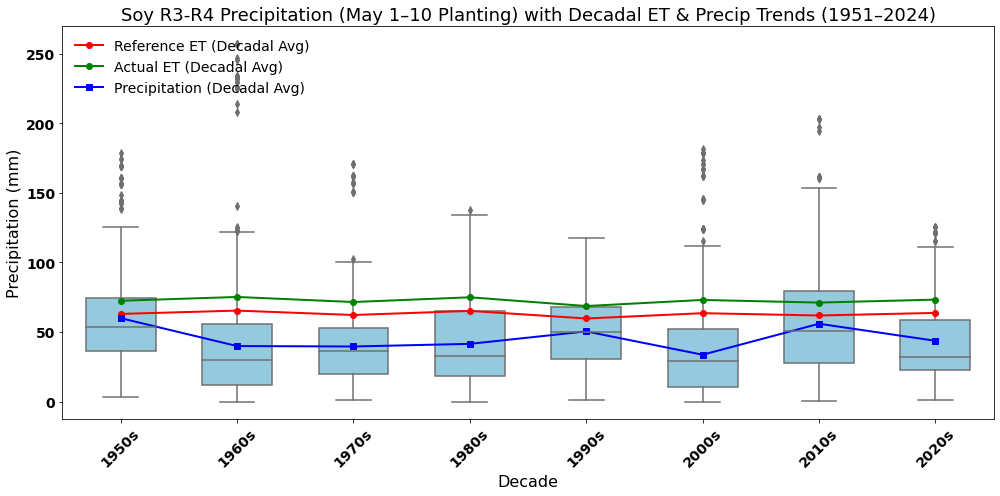

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Load ET data ---
et_df = pd.read_csv("HS ET data/Cumulative_ET_July27_Aug8_1951_2024.csv")

# --- Make Decade column ---
precip_df_plantingwindow["Decade"] = (precip_df_plantingwindow["Year"] // 10) * 10
et_df["Decade"] = (et_df["Year"] // 10) * 10

# --- Keep full distribution for boxplot ---
precip_decadal = precip_df_plantingwindow.copy()

# --- Aggregate ET by decade (mean) ---
et_decadal = et_df.groupby("Decade", as_index=False).agg({
    "RefET_soy_R3-R4": "mean",
    "ActET_soy_R3-R4": "mean"
})

# --- Aggregate precipitation by decade (mean) ---
precip_mean = (
    precip_decadal.groupby("Decade", as_index=False)["Precipitation (mm)"]
    .mean()
    .rename(columns={"Precipitation (mm)": "Precip_mean"})
)

# --- Sorted decade labels ---
decades = sorted(precip_decadal["Decade"].unique())
xpos = np.arange(len(decades))

# --- Reindex precip mean to match order ---
precip_mean = precip_mean.set_index("Decade").reindex(decades).reset_index()

# --- Plot ---
plt.figure(figsize=(14, 7))

# Precipitation boxplot (by decade)
sns.boxplot(
    data=precip_decadal,
    x="Decade",
    y="Precipitation (mm)",
    color="skyblue",
    order=decades,
    width=0.6
)

# Overlay Reference ET (red line)
plt.plot(
    xpos,
    et_decadal["RefET_soy_R3-R4"],
    color="red", marker="o", linewidth=2, label="Reference ET (Decadal Avg)"
)

# Overlay Actual ET (green line)
plt.plot(
    xpos,
    et_decadal["ActET_soy_R3-R4"],
    color="green", marker="o", linewidth=2, label="Actual ET (Decadal Avg)"
)

# Overlay Precipitation mean (blue dashed line with square markers)
plt.plot(
    xpos,
    precip_mean["Precip_mean"],
    color="blue", marker="s", linewidth=2, 
    label="Precipitation (Decadal Avg)"
)

# Customize axes/titles
plt.title("Soy R3-R4 Precipitation (May 1–10 Planting) with Decadal ET & Precip Trends (1951–2024)", fontsize=18)
plt.xlabel("Decade", fontsize=16)
plt.ylabel("Precipitation (mm)", fontsize=16)

plt.xticks(ticks=xpos, labels=[f"{d}s" for d in decades], rotation=45, fontsize=14, fontweight="bold")
plt.yticks(fontsize=14, fontweight="bold")

plt.legend(loc="upper left", fontsize=14, frameon=False)

# Save at 300 dpi for publication
plt.tight_layout()
plt.savefig(
    "Soy_Simulated AllCounties_GDD_1951_2024/HS_VT-R1_precip_boxplot_decadal_with_avg_Minnesota.png",
    dpi=300, bbox_inches='tight'
)
plt.show()


In [26]:
import pandas as pd

# --- Add Decade column ---
et_df["Decade"] = (et_df["Year"] // 10) * 10
precip_df_plantingwindow["Decade"] = (precip_df_plantingwindow["Year"] // 10) * 10

# --- ET decadal stats (mean + median) ---
et_decadal = (
    et_df.groupby("Decade", as_index=False)
         .agg({
             "RefET_soy_R3-R4": ["mean", "median"],
             "ActET_soy_R3-R4": ["mean", "median"]
         })
)
et_decadal.columns = ["Decade", "RefET_mean", "RefET_median", "ActET_mean", "ActET_median"]

# --- Precip decadal stats (mean + median) ---
precip_decadal = (
    precip_df_plantingwindow.groupby("Decade", as_index=False)
         .agg({"Precipitation (mm)": ["mean", "median"]})
)
precip_decadal.columns = ["Decade", "Precip_mean", "Precip_median"]

# --- Merge ---
decadal_table = pd.merge(et_decadal, precip_decadal, on="Decade")

# --- Build DecadeRange ---
def make_range(d, last_year=2024):
    if d == 2020:   # special handling for last partial bin
        return f"2021-{last_year}"
    else:
        return f"{d+1}-{d+10}"

decadal_table["Year"] = decadal_table["Decade"].apply(make_range)

# --- Reorder columns for readability ---
decadal_table = decadal_table[[
    "Year", "RefET_mean", "RefET_median",
    "ActET_mean", "ActET_median",
    "Precip_mean", "Precip_median"
]]

# Round values
decadal_table = decadal_table.round(2)

# --- Display ---
print(decadal_table.to_string(index=False))

# --- Save ---
decadal_table.to_csv("Soy_R3-R4Decadal_ET_Precip_Mean_Median.csv", index=False)


     Year  RefET_mean  RefET_median  ActET_mean  ActET_median  Precip_mean  Precip_median
1951-1960       63.02         60.73       72.47         69.84        59.97          53.66
1961-1970       65.40         64.96       75.21         74.70        39.90          30.21
1971-1980       62.24         60.84       71.58         69.96        39.59          36.67
1981-1990       65.19         66.11       74.97         76.03        41.48          32.71
1991-2000       59.73         59.99       68.69         68.99        50.44          50.06
2001-2010       63.55         64.30       73.08         73.94        33.68          29.04
2011-2020       61.88         62.47       71.17         71.84        55.94          50.74
2021-2024       63.74         62.35       73.30         71.70        43.68          32.20


In [17]:
import pandas as pd
import os

# === Step 0: Setup ===
county_names = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Becker", "Hubbard", "Kandiyohi"
]
planting_date = pd.Timestamp("2024-05-08")

# Output folder
output_folder = "Soybean_2024_Growth_Stages_Diff"
os.makedirs(output_folder, exist_ok=True)

# === Step 1: Load and process Becker 2024 growth stages ===
becker_2024 = pd.read_csv("Becker 2024 Soy growth stages.csv")
becker_2024.columns = becker_2024.columns.str.strip()
becker_2024["Date"] = pd.to_datetime(becker_2024["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

ordered_stages = [
    'VE', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'
]

# Mode-based thresholds
becker_mode = becker_2024.groupby("Date")["Growth Stage"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

becker_mode_with_agdd = pd.merge(becker_mode, becker_2024, on=["Date", "Growth Stage"], how="left")
becker_mode_with_agdd["Becker DAP"] = (becker_mode_with_agdd["Date"] - planting_date).dt.days
becker_thresholds = becker_mode_with_agdd.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds["Growth Stage"] = pd.Categorical(becker_thresholds["Growth Stage"], categories=ordered_stages, ordered=True)
becker_thresholds = becker_thresholds.sort_values("Growth Stage").dropna()

# === Step 2: Function to calculate growth stage table with differences ===
def get_stage_table_with_becker_dap(df, thresholds_df, planting_date, county, crop_name="Soybean"):
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["Year"] == 2024].copy()
    df["DAP"] = (df["time"] - planting_date).dt.days

    results = []
    for _, row in thresholds_df.iterrows():
        stage = row["Growth Stage"]
        threshold = row["AGDD"]
        dap_becker = int(row["Becker DAP"])
        hit = df[df["Cumulative_GDD"] >= threshold]
        if not hit.empty:
            match = hit.iloc[0]
            county_dap = (match["time"] - planting_date).days
            county_agdd = round(match["Cumulative_GDD"], 1)
            results.append({
                "Crop": crop_name,
                "Stage": stage,
                "Becker DAP": dap_becker,
                f"{county} DAP": county_dap,
                "DAP Difference": county_dap - dap_becker,
                "Becker AGDD (°F)": round(threshold, 2),
                f"{county} AGDD (°F)": county_agdd,
                "AGDD Difference": county_agdd - round(threshold, 2)
            })
    return pd.DataFrame(results)

# === Step 3: Loop through counties and save results ===
for county in county_names:
    file_name = f"{county}_growing2024_Soybean_GDD_1951_2024.csv"
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name, parse_dates=["time"])
        final_table = get_stage_table_with_becker_dap(df, becker_thresholds, planting_date, county)

        final_table["Stage"] = pd.Categorical(final_table["Stage"], categories=ordered_stages, ordered=True)
        final_table = final_table.sort_values("Stage").reset_index(drop=True)

        output_path = os.path.join(output_folder, f"{county}_2024_growth_stage_diff.csv")
        final_table.to_csv(output_path, index=False)
        print(f"Saved: {output_path}")
    else:
        print(f"File not found: {file_name}")


Saved: Soybean_2024_Growth_Stages_Diff/Wadena_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Cass_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Crow_Wing_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Todd_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Morrison_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Douglas_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Otter_Tail_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Pope_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Stearns_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Sherburne_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Benton_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Becker_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Hubbard_2024_growth_stage_diff.csv
Saved: Soybean_2024_Growth_Stages_Diff/Kan

In [18]:
import pandas as pd

# Define Fahrenheit conversion
def c_to_f(temp_c):
    return (temp_c * 9/5) + 32

# Dictionary of all counties
# list of county DataFrames
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}
# Loop through each county
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])
    all_years = []

    for year in range(1951, 2025):
        soy = SoyGDD(df, 'time', 'tmin', 'tmax')
        start = pd.to_datetime(f"{year}-05-11").date()
        end = pd.to_datetime(f"{year}-12-31").date()

        gdd_df = soy.soy_gdd(start, end)
        gdd_df['Year'] = year
        gdd_df['GDD'] = gdd_df['GDD'].apply(c_to_f)
        gdd_df['Cumulative_GDD'] = gdd_df['Cumulative_GDD'].apply(c_to_f)

        all_years.append(gdd_df)

    # Combine and save
    historical_df = pd.concat(all_years, ignore_index=True)
    historical_df.to_csv(f"{county_name}_growing2023_Soybean_GDD_1951_2024.csv", index=False)
    print(f"Saved: {county_name}_growing2023_Soybean_GDD_1951_2024.csv")


Saved: Wadena_growing2023_Soybean_GDD_1951_2024.csv
Saved: Cass_growing2023_Soybean_GDD_1951_2024.csv
Saved: Crow_Wing_growing2023_Soybean_GDD_1951_2024.csv
Saved: Todd_growing2023_Soybean_GDD_1951_2024.csv
Saved: Morrison_growing2023_Soybean_GDD_1951_2024.csv
Saved: Douglas_growing2023_Soybean_GDD_1951_2024.csv
Saved: Otter_Tail_growing2023_Soybean_GDD_1951_2024.csv
Saved: Pope_growing2023_Soybean_GDD_1951_2024.csv
Saved: Stearns_growing2023_Soybean_GDD_1951_2024.csv
Saved: Sherburne_growing2023_Soybean_GDD_1951_2024.csv
Saved: Benton_growing2023_Soybean_GDD_1951_2024.csv
Saved: Becker_growing2023_Soybean_GDD_1951_2024.csv
Saved: Hubbard_growing2023_Soybean_GDD_1951_2024.csv
Saved: Kandiyohi_growing2023_Soybean_GDD_1951_2024.csv


In [19]:
import pandas as pd
import os

# === Step 0: Setup ===
county_names = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Becker", "Hubbard", "Kandiyohi"
]
planting_date = pd.Timestamp("2023-05-10")

# === Step 1: Load and process Becker 2023 ===
becker_2023 = pd.read_csv("Becker 2023 Soy growth stages.csv")
becker_2023.columns = becker_2023.columns.str.strip()
becker_2023["Date"] = pd.to_datetime(becker_2023["Date"] + "-2023", format="%d-%b-%Y", errors="coerce")

ordered_stages = [
    'VE', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'
]

# Get mode-based growth stages
becker_mode = becker_2023.groupby("Date")["Growth Stage"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

# Merge with AGDD values and calculate DAP
becker_mode_with_agdd = pd.merge(becker_mode, becker_2023, on=["Date", "Growth Stage"], how="left")
becker_mode_with_agdd["Becker DAP"] = (becker_mode_with_agdd["Date"] - planting_date).dt.days
becker_thresholds = becker_mode_with_agdd.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds["Growth Stage"] = pd.Categorical(becker_thresholds["Growth Stage"], categories=ordered_stages, ordered=True)
becker_thresholds = becker_thresholds.sort_values("Growth Stage").dropna()

# === Step 2: Growth stage table generator for 2023 ===
def get_stage_table_2023(df, thresholds_df, planting_date, county, crop_name="Soybean"):
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["Year"] == 2023].copy()
    df["DAP"] = (df["time"] - planting_date).dt.days

    results = []
    for _, row in thresholds_df.iterrows():
        stage = row["Growth Stage"]
        threshold = row["AGDD"]
        dap_becker = int(row["Becker DAP"])

        hit = df[df["Cumulative_GDD"] >= threshold]
        if not hit.empty:
            match = hit.iloc[0]
            results.append({
                "Crop": crop_name,
                "Stage": stage,
                "AGDD Threshold(°F)": round(threshold, 2),
                "DAP Threshold": dap_becker,
                f"{county} 2023 DAP": (match["time"] - planting_date).days,
                f"{county} 2023 AGDD(°F)": round(match["Cumulative_GDD"], 1)
            })
    return pd.DataFrame(results)

# === Step 3: Loop through counties and print results ===
for county in county_names:
    file_name = f"{county}_growing2024_Soybean_GDD_1951_2024.csv"  # This still contains 2023 data
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name, parse_dates=["time"])
        final_table = get_stage_table_2023(df, becker_thresholds, planting_date, county)

        final_table["Stage"] = pd.Categorical(final_table["Stage"], categories=ordered_stages, ordered=True)
        final_table = final_table.sort_values("Stage").reset_index(drop=True)

        print(f"\n===== {county}_2023 =====")
        print(final_table.to_string(index=False))
    else:
        print(f" File not found: {file_name}")



===== Wadena_2023 =====
   Crop Stage  AGDD Threshold(°F)  DAP Threshold  Wadena 2023 DAP  Wadena 2023 AGDD(°F)
Soybean    VE              191.16             14               12                 204.6
Soybean    V1              334.89             21               21                 352.7
Soybean    V3              502.29             28               28                 514.4
Soybean    V6              606.96             35               35                 622.2
Soybean    V7              771.66             42               43                 774.0
Soybean   V10              941.85             49               52                 950.6
Soybean    R1             1101.60             56               61                1103.1
Soybean    R2             1350.81             70               77                1372.5
Soybean    R3             1011.15             83               55                1018.2
Soybean    R4             1296.72             98               74                1303.8
Soybean

In [20]:
import os
import pandas as pd

# === Setup ===
county_names = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Becker", "Hubbard", "Kandiyohi"
]
planting_date = pd.Timestamp("2023-05-10")

# === Load Becker 2023 and calculate thresholds ===
becker_2023 = pd.read_csv("Becker 2023 Soy growth stages.csv")
becker_2023.columns = becker_2023.columns.str.strip()
becker_2023["Date"] = pd.to_datetime(becker_2023["Date"] + "-2023", format="%d-%b-%Y", errors="coerce")

ordered_stages = [
    'VE', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'
]

# Compute mode-based thresholds
becker_mode = becker_2023.groupby("Date")["Growth Stage"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

becker_mode_with_agdd = pd.merge(becker_mode, becker_2023, on=["Date", "Growth Stage"], how="left")
becker_mode_with_agdd["Becker DAP"] = (becker_mode_with_agdd["Date"] - planting_date).dt.days
becker_thresholds = becker_mode_with_agdd.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds["Growth Stage"] = pd.Categorical(becker_thresholds["Growth Stage"], categories=ordered_stages, ordered=True)
becker_thresholds = becker_thresholds.sort_values("Growth Stage").dropna()

# === Growth Stage Table Function ===
def get_stage_table_with_becker_dap_2023(df, thresholds_df, planting_date, county, crop_name="Soybean"):
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["Year"] == 2023].copy()
    df["DAP"] = (df["time"] - planting_date).dt.days

    results = []
    for _, row in thresholds_df.iterrows():
        stage = row["Growth Stage"]
        threshold = row["AGDD"]
        hit = df[df["Cumulative_GDD"] >= threshold]
        if not hit.empty:
            match = hit.iloc[0]
            results.append({
                "Crop": crop_name,
                "Stage": stage,
                f"{county} 2023 DAP": (match["time"] - planting_date).days,
                f"{county} 2023 AGDD (°F)": round(match["Cumulative_GDD"], 1)
            })
    return pd.DataFrame(results)

# === Create Folder and Save ===
output_folder = "Soybean_Growth_Stages_2023"
os.makedirs(output_folder, exist_ok=True)

for county in county_names:
    file_name = f"{county}_growing2023_Soybean_GDD_1951_2024.csv"
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name, parse_dates=["time"])
        final_table = get_stage_table_with_becker_dap_2023(df, becker_thresholds, planting_date, county)

        final_table["Stage"] = pd.Categorical(final_table["Stage"], categories=ordered_stages, ordered=True)
        final_table = final_table.sort_values("Stage").reset_index(drop=True)

        # Save to folder
        output_path = os.path.join(output_folder, f"{county}_2023_growth_stage.csv")
        final_table.to_csv(output_path, index=False)
    else:
        print(f" File not found: {file_name}")


In [21]:
import pandas as pd
import os

# === Step 0: Setup ===
county_names = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Becker", "Hubbard", "Kandiyohi"
]
planting_date = pd.Timestamp("2023-05-10")

# Output folder
output_folder = "Soybean_2023_Growth_Stages_Diff"
os.makedirs(output_folder, exist_ok=True)

# === Step 1: Load and process Becker 2023 growth stages ===
becker_2023 = pd.read_csv("Becker 2023 Soy growth stages.csv")
becker_2023.columns = becker_2023.columns.str.strip()
becker_2023["Date"] = pd.to_datetime(becker_2023["Date"] + "-2023", format="%d-%b-%Y", errors="coerce")

ordered_stages = [
    'VE', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'
]

# Mode-based thresholds
becker_mode = becker_2023.groupby("Date")["Growth Stage"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

becker_mode_with_agdd = pd.merge(becker_mode, becker_2023, on=["Date", "Growth Stage"], how="left")
becker_mode_with_agdd["Becker DAP"] = (becker_mode_with_agdd["Date"] - planting_date).dt.days
becker_thresholds = becker_mode_with_agdd.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds["Growth Stage"] = pd.Categorical(becker_thresholds["Growth Stage"], categories=ordered_stages, ordered=True)
becker_thresholds = becker_thresholds.sort_values("Growth Stage").dropna()

# === Step 2: Function to calculate growth stage table with differences ===
def get_stage_table_with_becker_dap(df, thresholds_df, planting_date, county, crop_name="Soybean"):
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["Year"] == 2023].copy()
    df["DAP"] = (df["time"] - planting_date).dt.days

    results = []
    for stage in thresholds_df["Growth Stage"].cat.categories:
        row = thresholds_df[thresholds_df["Growth Stage"] == stage]
        if row.empty:
            continue
        threshold = row["AGDD"].values[0]
        dap_becker = int(row["Becker DAP"].values[0])
        hit = df[df["Cumulative_GDD"] >= threshold]
        if not hit.empty:
            match = hit.iloc[0]
            county_dap = (match["time"] - planting_date).days
            county_agdd = round(match["Cumulative_GDD"], 1)
        else:
            county_dap = None
            county_agdd = None

        results.append({
            "Crop": crop_name,
            "Stage": stage,
            "Becker DAP": dap_becker,
            f"{county} DAP": county_dap,
            "DAP Difference": None if county_dap is None else county_dap - dap_becker,
            "Becker AGDD (°F)": round(threshold, 2),
            f"{county} AGDD (°F)": county_agdd,
            "AGDD Difference": None if county_agdd is None else county_agdd - round(threshold, 2)
        })

    return pd.DataFrame(results)

# === Step 3: Loop through counties and save results ===
for county in county_names:
    file_name = f"{county}_growing2023_Soybean_GDD_1951_2024.csv"
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name, parse_dates=["time"])
        final_table = get_stage_table_with_becker_dap(df, becker_thresholds, planting_date, county)

        final_table["Stage"] = pd.Categorical(final_table["Stage"], categories=ordered_stages, ordered=True)
        final_table = final_table.sort_values("Stage").reset_index(drop=True)

        output_path = os.path.join(output_folder, f"{county}_2023_growth_stage_diff.csv")
        final_table.to_csv(output_path, index=False)
        print(f"Saved: {output_path}")
    else:
        print(f"File not found: {file_name}")


Saved: Soybean_2023_Growth_Stages_Diff/Wadena_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Cass_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Crow_Wing_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Todd_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Morrison_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Douglas_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Otter_Tail_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Pope_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Stearns_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Sherburne_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Benton_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Becker_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Hubbard_2023_growth_stage_diff.csv
Saved: Soybean_2023_Growth_Stages_Diff/Kan